In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from copy import deepcopy
import pickle

In [6]:
data = pd.read_csv('topic_fr.csv',index_col=0)

In [7]:
long_titles_err = deepcopy(list(data.index))
long_titles = []
for title in long_titles_err :
    fixed = []
    for word in title.split(' ') :
        word = word.replace('_','')
        if word != 'par' and word !='de' and word != 'et' :
            fixed.append(word.title())
        else :
            fixed.append(word)
    fixed = ' '.join(fixed)
    long_titles.append(fixed)

In [8]:
hyper_titles = []
for title in long_titles :
    title = title.split(';')
    title = ''.join(title)
    title = title.replace("'",'')
    title = title.replace(';','')
    title = title.replace(',','')
    title = title.replace('"','')
    title = title.replace('(','')
    title = title.replace(')','')
    title = title.replace(' ','_')
    hyper_titles.append(title)

In [10]:
pickle.dump(dict(sorted(list(zip(hyper_titles, long_titles)))),open('fr_title_dictionary.pkl','wb'))

In [11]:
data.index = hyper_titles
data.to_csv('topic_fr_hyper.csv')

In [13]:
# Scaling my data because of distance measurements.
scaler = StandardScaler()
d_s = scaler.fit_transform(data)

# K Means
No clear break in the graph, clusters are very small or big - probably inseparable data.

In [5]:
inertias = []
sils = []
for k in range(2,11) :
    km = KMeans(n_clusters=k,random_state=8)
    km.fit(d_s)
    labels = km.labels_
    inertias.append(km.inertia_)
    sils.append(silhouette_score(d_s, labels, metric='euclidean'))

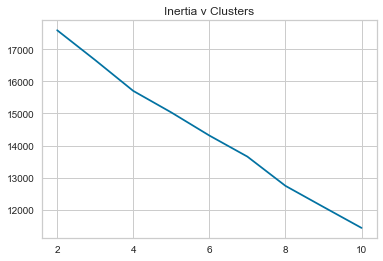

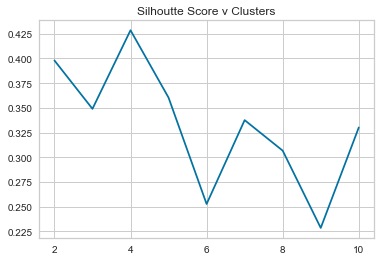

In [6]:
plt.plot(list(range(2,11)),inertias)
plt.title('Inertia v Clusters')
plt.xticks(ticks=list(range(2,11,2)))
plt.show()
plt.plot(list(range(2,11)),sils)
plt.title('Silhoutte Score v Clusters')
plt.xticks(ticks=list(range(2,11,2)))
plt.show()

In [7]:
data.columns

Index(['romdram', 'war', 'revolution', 'countryside', 'spy_detect', 'pol_econ',
       'boats', 'drama_life', 'foreign_exp', 'bus_commerce', 'relig',
       'francoprussian', 'fairies', 'arts_bohe', 'knights', 'law_crime',
       'candide'],
      dtype='object')

In [8]:
# Here I try to set potential centroids on my own - to no avail
initial_centroids = np.array([
    [2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0], #romdram/life_dram
    [0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #revolutionary war
    [0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0], #fairytales
    [0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0], #francoprussian war
    [0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0], #crime and law
    [0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0], #politics, business, commerce
    [0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0], #fantasy
    [0,0,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0], #travel
    [0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,2]  #arts,philosophy, and religion
])

/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


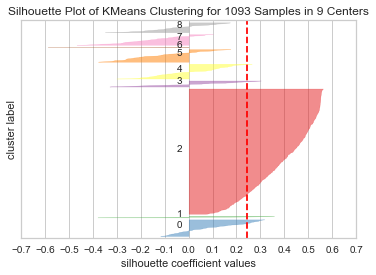

In [9]:
km = KMeans(n_clusters=9,random_state=8,init=initial_centroids)
km.fit(d_s)
vis = SilhouetteVisualizer(km)
vis.fit(d_s)
vis.poof()

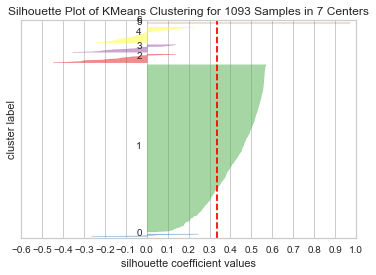

In [10]:
km = KMeans(n_clusters=7,random_state=8)
km.fit(d_s)
vis = SilhouetteVisualizer(km)
vis.fit(d_s)
vis.poof()

In [11]:
km.cluster_centers_

array([[ 8.97200185e-01,  9.86203054e-03, -1.09918943e-01,
        -9.06321525e-02,  1.09247646e+00, -1.83313306e-01,
        -9.75681464e-02,  5.76730663e-02, -2.79194316e-01,
         2.92372805e+00,  1.99016398e-01, -1.40028462e-01,
        -6.26777803e-02,  2.48344599e-01, -8.01888005e-02,
         6.50934590e+00,  1.24571139e-01],
       [-1.90878148e-02, -7.12313875e-03, -1.02610412e-01,
        -1.71373496e-02, -7.98154122e-03, -1.04449931e-01,
        -1.19450387e-01, -5.22584387e-02, -1.25758876e-01,
        -8.35450024e-02, -5.69745029e-02, -1.67371687e-01,
        -3.36515019e-02, -2.11736612e-01, -3.71834570e-02,
        -1.17172625e-01, -5.08251110e-02],
       [-1.52283423e-01,  1.52595982e-01,  2.01890408e+00,
        -2.68172534e-02,  2.26060104e-04,  8.69359713e-01,
         9.26437977e-02,  2.91357603e-02, -1.21509359e-01,
        -2.21977761e-01, -4.11431320e-02,  3.46332939e+00,
         6.79761440e-01, -3.00154954e-01,  7.05142031e-01,
        -3.26701486e-02,  1.5

# HAC
Also struggles.

In [12]:
ac = AgglomerativeClustering(n_clusters=None,distance_threshold=37,linkage='ward')
ac.fit(d_s)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=37,
                        linkage='ward', memory=None, n_clusters=None,
                        pooling_func='deprecated')

In [13]:
example = pd.DataFrame(zip(data.index,ac.labels_))

In [14]:
example.groupby(1).count() #1 is column representing cluster assignment

,0
1,
0,863
1,197
2,6
3,2
4,21
5,1
6,1
7,1
8,1


In [ ]:
example[example[1]==5] #les mis truly is a unique novel, apparently
#despite everything, the smaller clusters appear to be legitimate as they include books and their sequels or, in one case,
#two editions of the same book - it's just not helpful to us.

# DBSCAN
Equally struggles.

In [16]:
db = DBSCAN(eps=1.15, min_samples=3)

In [17]:
#db = DBSCAN(eps=.9, min_samples=2)
#this did not improve things

In [18]:
db.fit(d_s)

DBSCAN(algorithm='auto', eps=1.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [19]:
core = db.core_sample_indices_.tolist()

In [20]:
ex = pd.DataFrame(zip(data.index,db.labels_))

In [21]:
ex.groupby(1).count()

,0
1,
-1,408
0,640
1,4
2,4
3,4
4,6
5,4
6,3
7,11


In [22]:
ex[ex[1]==4] # definitely picking up on authors, but not general groupings

,0,1
180,"dame de Monsoreau I, La; par Alexandre Dumas",4
317,"dame de Monsoreau III, La; par Alexandre Dumas",4
613,"Horoscope, L'; par Alexandre Dumas",4
907,"Quarante-Cinq I, Les; par Alexandre Dumas",4
940,"Quarante-Cinq II, Les; par Alexandre Dumas",4
1050,"dame de Monsoreau II, La; par Alexandre Dumas",4


### PCA visualisation of inseparability

In [14]:
pca = PCA(n_components=3,random_state=8)

In [15]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=8,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca_data = pd.DataFrame(pca.transform(data))

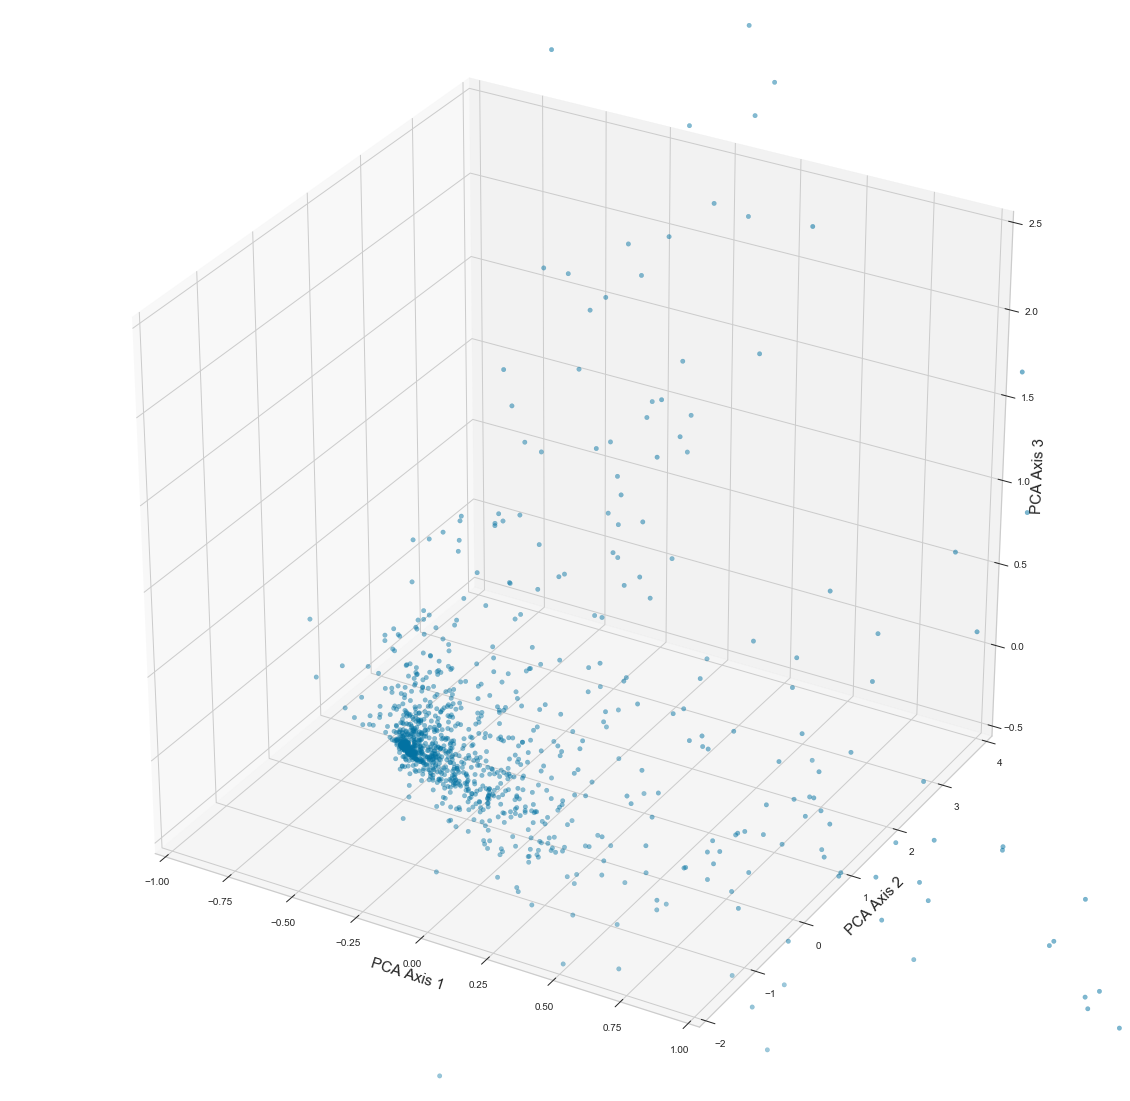

In [30]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[0],pca_data[1],pca_data[2])
plt.xlabel("PCA Axis 1",fontdict={'fontsize':15})
plt.ylabel("PCA Axis 2",fontdict={'fontsize':15})
plt.xlim(-1,1)
plt.ylim(-2,4)
ax.set_zlim(-.5,2.5)
ax.set_zlabel("PCA Axis 3",fontdict={'fontsize':15})
plt.show()

# A glob plus outliers - obvs not going to separate well